In [1]:
import numpy as np
import pandas as pd
import logging
import matplotlib.pyplot as plt
import os

from sklearn.datasets import load_iris, fetch_california_housing
from sklearn.linear_model import Perceptron
from sklearn.preprocessing import Normalizer, StandardScaler
from sklearn.model_selection import train_test_split

import tensorflow as tf
tf.config.set_visible_devices([], 'GPU')
from tensorflow import keras
from tensorflow.keras import layers

In [2]:
format_logging = '%(levelname)s:\n\t%(message)s'

logging.basicConfig(format=format_logging, level=logging.INFO)

In [3]:
#from google.colab import drive
#drive.mount('/content/drive')

# From Biological to Artificial Neurons

## The perceptron

The perceptron is calles a *threshold logic unit* (TLU), and it computes a weighted sum of its inputs. The equation for such a sum is the following:    

- $z = w_{1}x_1 + w_2x_2 + ... + w_nx_n = \textbf{x}^\intercal\textbf{w}$

The output of the perceptron passes by a step function. The most common step function is *Heaviside step function* and it is as follows:

- $\text{heaviside } (z) = \begin{cases}{0 \quad \text{ if } z < 0} \\ {1 \quad \text{ if } z \ge 0}\end{cases} \qquad \text{sgn }(z) = \begin{cases} {-1 \quad \text{ if } z < 0 } \\ {0 \qquad \text{if } z = 0} \\ {1 \qquad \text{if } z > 0} \end{cases}$

This is how the plot of the Heaviside function looks like:

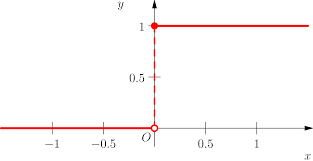

In order to compute the outputs of a layer of artificial neurons for several instances at once, the following equation is used:

> $h_{\textbf{W,b}}(\textbf{X}) = \phi(\textbf{XW+b})$
>
> Where:
> - $\textbf{X}$ is the input of the model
> - $\textbf{W}$ is the matrix that contains the weights
> - $\phi$ is the *activation function* 
> - $\textbf{b}$ is the bias vector that contains the weights of all the bias neurons.

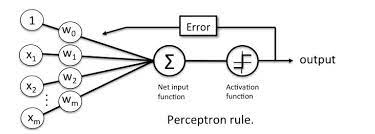

The training of the perceptrons rewards the connections among neurons that contribute to the correct prediction. The equation is the following: 

- Perceptron learning rule (weight update)
> $w_{i,j}^{(\text{next step})} = w_{i,j} + \eta (y_{j} - \hat{y_{j}}) x_{j}$ 
>
> where:
> - $w_{i,j}$ is the vector containing the weights between the $i^{th}$ input neuron to the  $j^{th}$ ouput neuron
> - $\eta$ is the learning rate of the perceptron

Let's implement a perceptron using the ```Perceptron``` function provided by Scikit-Learn

In [4]:
# Load the Iris dataset 

iris = load_iris()
x = iris.data[:, (2, 3)]
y = (iris.target == 0).astype(int)

/var/folders/w1/7wtz55rs63b9743vzqfb8p880000gp/T/ipykernel_2011/1275418508.py:5: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y = (iris.target == 0).astype(np.int)


In [5]:
per_clf = Perceptron()
per_clf.fit(x, y)

y_pred = per_clf.predict([[2, 0.5], [3, 1.2]])

In [6]:
logging.info(f'The classes predicted are: {y_pred}')

INFO:
	The classes predicted are: [0 0]


# Implementing MLP with Keras

In [7]:
logging.info(f'The version of Tensorflow installed in this server is {tf.__version__}, and the version of Keras is {keras.__version__}')

INFO:
	The version of Tensorflow installed in this server is 2.7.0, and the version of Keras is 2.7.0


## Building an Image Classifier Using the Sequential API

In [8]:
# Fetch and load the data using Keras 

fashion_mnist = keras.datasets.fashion_mnist
(x_train_full, y_train_full), (x_test, y_test) = fashion_mnist.load_data()

In [9]:
logging.info(f'The shape of the training data is {x_train_full.shape} and the type of data is [{x_train_full.dtype}]')

INFO:
	The shape of the training data is (60000, 28, 28) and the type of data is [uint8]


In [10]:
# Separate the training data between training and validation data
# and normalize their values between 0 and 1

x_train, x_valid = x_train_full[:50000] / 255, x_train_full[50000:] / 255
y_train, y_valid = y_train_full[:50000], y_train_full[50000:]

In [11]:
logging.info(f'The minimum value for a pixel is {x_train.min()}, and the maximum value is {x_train.max()}')

INFO:
	The minimum value for a pixel is 0.0, and the maximum value is 1.0


In [12]:
# List of the names of the classes for the Fashion MNIST dataset

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [13]:
logging.info(f'The classes for the first 10 instances in the training set are {[class_names[instance] for instance in y_train[:10]]}')

INFO:
	The classes for the first 10 instances in the training set are ['Ankle boot', 'T-shirt/top', 'T-shirt/top', 'Dress', 'T-shirt/top', 'Pullover', 'Sneaker', 'Pullover', 'Sandal', 'Sandal']


In [14]:
def plot_mnist(x, y, classes, samples):

  n_rows = (samples // 10) + 1
  n_cols = 10

  plt.figure(figsize=(n_cols * 1.5, n_rows * 1.8))

  for i in range(samples):
    plt.subplot(n_rows, n_cols, i+1)
    plt.imshow(x[i], cmap='gray_r')
    plt.title(classes[y[i]])
    plt.axis('off')
  
  plt.show()

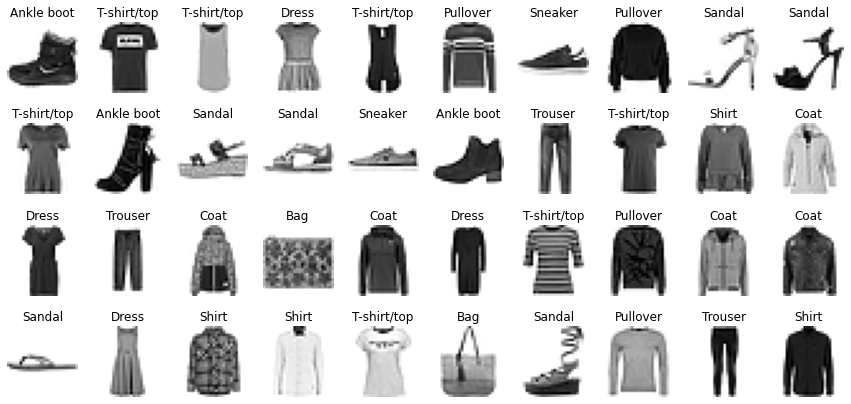

In [15]:
plot_mnist(x_train, y_train, class_names, 40)

In [16]:
# Create the sequential model

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation='relu'),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

In [17]:
model_summary = model.summary()

logging.info(f'The Summary of our model is: \n{model_summary}')

INFO:
	The Summary of our model is: 
None


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [18]:
list_layers = ''

for layer in model.layers:
  list_layers += f'\n\t{layer.name}: {layer}'

logging.info(f'The layers of the model are: \n{list_layers}')

INFO:
	The layers of the model are: 

	flatten: <keras.layers.core.flatten.Flatten object at 0x2a431cc10>
	dense: <keras.layers.core.dense.Dense object at 0x2a44aa790>
	dense_1: <keras.layers.core.dense.Dense object at 0x2a44aa430>
	dense_2: <keras.layers.core.dense.Dense object at 0x2a44aac10>


In [19]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

## Training and evaluating the model

In [20]:
history = model.fit(x_train, y_train, epochs=30, validation_data=(x_valid, y_valid), verbose=0)

2021-12-09 16:47:53.314759: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


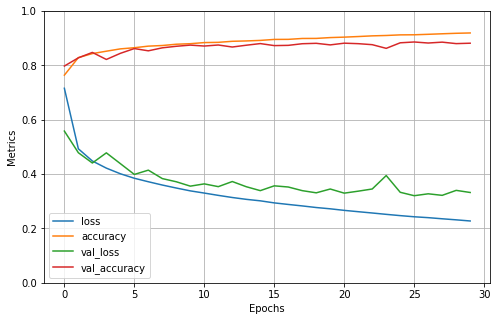

In [21]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.xlabel('Epochs')
plt.ylabel('Metrics')
plt.show()

In [22]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 0s 653us/step - loss: 73.3424 - accuracy: 0.8367


[73.34235382080078, 0.8367000222206116]

## Using the model to make predictions

In [23]:
x_new = x_test[101:104]
y_proba = model.predict(x_new)


In [24]:
y_pred = [np.argmax(class_) for class_ in model.predict(x_new)]
y_pred_classes = np.array(class_names)[y_pred]

y_test_classes = np.array(class_names)[y_test[101:104]]

logging.info(f'The predicted classes for model are {y_pred_classes}.\nThe actual classes are {y_test_classes}')

INFO:
	The predicted classes for model are ['Shirt' 'Sneaker' 'Shirt'].
The actual classes are ['Shirt' 'Sneaker' 'Pullover']


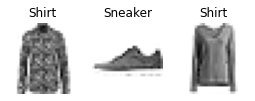

In [25]:
plot_mnist(x_new, y_pred, class_names, 3)

## Building a Regression MLP Using the Sequential API

In [26]:
# Load the data 
housing = fetch_california_housing()

x_train_full, x_test, y_train_full, y_test = train_test_split(housing.data, housing.target)
x_train, x_valid, y_train, y_valid = train_test_split(x_train_full, y_train_full)

In [27]:
# Scaling the features 
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_valid = scaler.transform(x_valid)
x_test = scaler.transform(x_test)

In [28]:
reg_model = keras.models.Sequential([
    layers.Dense(30, activation='relu', input_shape=x_train.shape[1:]),
    layers.Dense(1)
])

reg_model.compile(loss='mean_squared_error', optimizer='sgd')

reg_history = reg_model.fit(x_train, y_train, epochs=30, validation_data=(x_valid, y_valid), verbose=2)

Epoch 1/30
363/363 - 0s - loss: 0.8480 - val_loss: 0.5782 - 352ms/epoch - 969us/step
Epoch 2/30
363/363 - 0s - loss: 0.4886 - val_loss: 0.5214 - 107ms/epoch - 294us/step
Epoch 3/30
363/363 - 0s - loss: 0.5045 - val_loss: 0.6734 - 109ms/epoch - 299us/step
Epoch 4/30
363/363 - 0s - loss: 0.4580 - val_loss: 0.4309 - 111ms/epoch - 305us/step
Epoch 5/30
363/363 - 0s - loss: 0.4237 - val_loss: 0.4150 - 125ms/epoch - 343us/step
Epoch 6/30
363/363 - 0s - loss: 0.4287 - val_loss: 0.4092 - 117ms/epoch - 322us/step
Epoch 7/30
363/363 - 0s - loss: 0.4086 - val_loss: 0.4026 - 118ms/epoch - 326us/step
Epoch 8/30
363/363 - 0s - loss: 0.4007 - val_loss: 0.3928 - 118ms/epoch - 326us/step
Epoch 9/30
363/363 - 0s - loss: 0.4040 - val_loss: 0.3935 - 112ms/epoch - 309us/step
Epoch 10/30
363/363 - 0s - loss: 0.3918 - val_loss: 0.3893 - 109ms/epoch - 299us/step
Epoch 11/30
363/363 - 0s - loss: 0.3921 - val_loss: 0.3845 - 108ms/epoch - 298us/step
Epoch 12/30
363/363 - 0s - loss: 0.3918 - val_loss: 0.3793 - 10

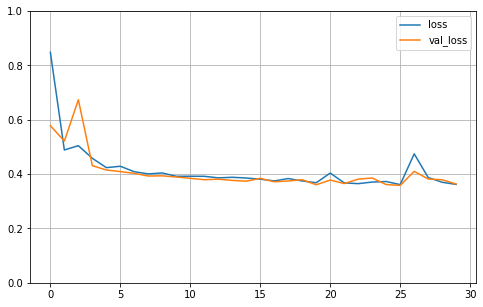

In [29]:
pd.DataFrame(reg_history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [30]:
mse_test = reg_model.evaluate(x_test, y_test)

logging.info(f'The MSE of the model is {mse_test}')

162/162 [==============================] - 0s 239us/step - loss: 0.3500


INFO:
	The MSE of the model is 0.3500209152698517


In [31]:
x_new = x_test[:3]
y_pred = reg_model.predict(x_new)

In [32]:
logging.info(f'The predictions are {y_pred} and the real values are {y_test[:3]}')

INFO:
	The predictions are [[0.7488307]
 [2.7764397]
 [1.8939478]] and the real values are [0.711 1.964 1.797]


## Building Complex Models Using the Functional API

In [33]:
input_layer = layers.Input(shape=x_train.shape[1:])
hidden1 = layers.Dense(30, activation='relu')(input_layer)
hidden2 = layers.Dense(30, activation='relu')(hidden1)
concat = layers.Concatenate()([input_layer, hidden2])
output_layer = layers.Dense(1)(concat)

model = keras.Model(inputs=[input_layer], outputs=[output_layer])

In [34]:
model.compile(optimizer='sgd', loss='mean_squared_error')

history = model.fit(x_train, y_train, epochs=30, validation_data=(x_valid, y_valid), verbose=1)

Epoch 1/30
363/363 [==============================] - 0s 489us/step - loss: 1.3331 - val_loss: 84.8296
Epoch 2/30
363/363 [==============================] - 0s 346us/step - loss: 22.4771 - val_loss: 17.9371
Epoch 3/30
363/363 [==============================] - 0s 340us/step - loss: nan - val_loss: nan
Epoch 4/30
363/363 [==============================] - 0s 354us/step - loss: nan - val_loss: nan
Epoch 5/30
363/363 [==============================] - 0s 343us/step - loss: nan - val_loss: nan
Epoch 6/30
363/363 [==============================] - 0s 372us/step - loss: nan - val_loss: nan
Epoch 7/30
363/363 [==============================] - 0s 358us/step - loss: nan - val_loss: nan
Epoch 8/30
363/363 [==============================] - 0s 350us/step - loss: nan - val_loss: nan
Epoch 9/30
363/363 [==============================] - 0s 365us/step - loss: nan - val_loss: nan
Epoch 10/30
363/363 [==============================] - 0s 352us/step - loss: nan - val_loss: nan
Epoch 11/30
363/363 [===

In [35]:
x_new = x_test[:3]
y_pred = reg_model.predict(x_new)

In [36]:
logging.info(f'The predictions are {y_pred} and the real values are {y_test[:3]}')

INFO:
	The predictions are [[0.7488307]
 [2.7764397]
 [1.8939478]] and the real values are [0.711 1.964 1.797]


Let's create a *Wide & Deep* neural network using the functional API:

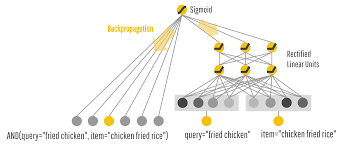

In [37]:
input_A = layers.Input(shape=[5], name='wide_input')
input_B = layers.Input(shape=[6], name='deep_input')
hidden1 = layers.Dense(30, activation='relu')(input_B)
hidden2 = layers.Dense(30, activation='relu')(hidden1)
concat = layers.Concatenate()([input_A, hidden2])
output_layer = layers.Dense(1, name='output')(concat)

model_wd = keras.Model(inputs=[input_A, input_B], outputs=[output_layer])

In [38]:
# Create two subsets for the input of the previous model

x_train_A, x_train_B = x_train[:, :5], x_train[:, 2:]
x_valid_A, x_valid_B = x_valid[:, :5], x_valid[:, 2:]
x_test_A, x_test_B = x_test[:, :5], x_test[:, 2:]
x_new_A, x_new_B = x_test_A[:3], x_test_B[:3]

In [39]:
model_wd.compile(loss='mse', optimizer=keras.optimizers.SGD(learning_rate=1e-3))

In [40]:
history = model_wd.fit((x_train_A, x_train_B), y_train, epochs=30, validation_data=((x_valid_A, x_valid_B), y_valid))

mse_test = model_wd.evaluate((x_test_A, x_test_B), y_test)
y_pred = model_wd.predict((x_new_A, x_new_B))

Epoch 1/30
363/363 [==============================] - 0s 530us/step - loss: 2.0996 - val_loss: 1.0827
Epoch 2/30
363/363 [==============================] - 0s 368us/step - loss: 0.8235 - val_loss: 0.7220
Epoch 3/30
363/363 [==============================] - 0s 384us/step - loss: 0.6606 - val_loss: 0.6228
Epoch 4/30
363/363 [==============================] - 0s 377us/step - loss: 0.6022 - val_loss: 0.5785
Epoch 5/30
363/363 [==============================] - 0s 371us/step - loss: 0.5687 - val_loss: 0.5532
Epoch 6/30
363/363 [==============================] - 0s 372us/step - loss: 0.5459 - val_loss: 0.5338
Epoch 7/30
363/363 [==============================] - 0s 374us/step - loss: 0.5295 - val_loss: 0.5204
Epoch 8/30
363/363 [==============================] - 0s 360us/step - loss: 0.5165 - val_loss: 0.5079
Epoch 9/30
363/363 [==============================] - 0s 412us/step - loss: 0.5067 - val_loss: 0.4990
Epoch 10/30
363/363 [==============================] - 0s 378us/step - loss: 0.497

Let's now create a model with multiple output layers:

In [41]:
input_A = layers.Input(shape=[5], name='wide_input')
input_B = layers.Input(shape=[6], name='deep_input')
hidden1 = layers.Dense(30, activation='relu')(input_B)
hidden2 = layers.Dense(30, activation='relu')(hidden1)
concat = layers.Concatenate()([input_A, hidden2])
output_layer = layers.Dense(1, name='main_output')(concat)
aux_output = layers.Dense(1, name='aux_output')(hidden2)

model_mo = keras.Model(inputs=[input_A, input_B], outputs=[output_layer, aux_output])

model_mo.compile(loss=['mse', 'mse'], loss_weights=[0.9, 0.1], optimizer='sgd')

history_mo = model_mo.fit([x_train_A, x_train_B], [y_train, y_train], epochs=30, validation_data=([x_valid_A, x_valid_B], [y_valid, y_valid]))

total_loss, main_loss, aux_loss = model_mo.evaluate([x_test_A, x_test_B], [y_test, y_test])

y_pred_main, y_pred_aux = model_mo.predict([x_new_A, x_new_B])

Epoch 1/30
363/363 [==============================] - 0s 674us/step - loss: 1.1163 - main_output_loss: 1.0358 - aux_output_loss: 1.8407 - val_loss: 0.6202 - val_main_output_loss: 0.5555 - val_aux_output_loss: 1.2021
Epoch 2/30
363/363 [==============================] - 0s 475us/step - loss: 0.6274 - main_output_loss: 0.5715 - aux_output_loss: 1.1305 - val_loss: 1.8752 - val_main_output_loss: 1.9558 - val_aux_output_loss: 1.1492
Epoch 3/30
363/363 [==============================] - 0s 516us/step - loss: 0.6089 - main_output_loss: 0.5711 - aux_output_loss: 0.9494 - val_loss: 0.4940 - val_main_output_loss: 0.4509 - val_aux_output_loss: 0.8815
Epoch 4/30
363/363 [==============================] - 0s 517us/step - loss: 0.4935 - main_output_loss: 0.4583 - aux_output_loss: 0.8103 - val_loss: 0.4955 - val_main_output_loss: 0.4645 - val_aux_output_loss: 0.7738
Epoch 5/30
363/363 [==============================] - 0s 538us/step - loss: 0.4738 - main_output_loss: 0.4453 - aux_output_loss: 0.7300 

## Using the Subclassing API to Build Dynamic Models

If we need to create a model with dynamic behavior, the solution is to subclass the ```Model``` class.

In [42]:
class WideAndDeepModel(keras.Model):

  def __init__(self, units=30, activation='relu', **kwargs):
    super().__init__(**kwargs)
    self.hidden1 = layers.Dense(units, activation=activation)
    self.hidden2 = layers.Dense(units, activation=activation)
    self.main_output = layers.Dense(1)
    self.aux_output = layers.Dense(1)

  def call(self, inputs):
    input_A, input_B = inputs
    hidden1 = self.hidden1(input_B)
    hidden2 = self.hidden2(hidden1)
    concat = layers.Concatenate([input_A, hidden2])
    main_output = self.main_output(concat)
    aux_output = self.aux_output(hidden2)

    return main_output, aux_output

In [43]:
# Create and instance specifying the inputs
input_A = layers.Input(shape=[5], name='wide_input')
input_B = layers.Input(shape=[6], name='deep_input')

dynamic_model = WideAndDeepModel()

## Saving and Resoring a Model

Let's save the model we created with multiple output layers ```model_mo```.

In [44]:
file_path = os.path.join('drive', 'MyDrive', 'ml-telus', 'hands_on_machine_learning', 'models', 'multi_output_layers_model.h5')

model_mo.save(file_path)

In order to load the model:     

In [45]:
loaded_model = keras.models.load_model(file_path)

## Using Callbacks

Creating a checkpoint for the ```model_mo``` saving only the best model on the validation data. 

In [46]:
checkpoint_cb = keras.callbacks.ModelCheckpoint(file_path, save_best_only=True)

history = model_mo.fit([x_train_A, x_train_B], [y_train, y_train], epochs=100, validation_data=([x_valid_A, x_valid_B],[y_valid, y_valid]), callbacks=[checkpoint_cb], verbose=0)
logging.info('The training of the model has finished')
logging.info('Loading the best model...')

best_model = keras.models.load_model(file_path)

logging.info(f'The best model is:\n{best_model.summary()}')

INFO:
	The training of the model has finished
INFO:
	Loading the best model...
INFO:
	The best model is:
None


Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 deep_input (InputLayer)        [(None, 6)]          0           []                               
                                                                                                  
 dense_10 (Dense)               (None, 30)           210         ['deep_input[0][0]']             
                                                                                                  
 wide_input (InputLayer)        [(None, 5)]          0           []                               
                                                                                                  
 dense_11 (Dense)               (None, 30)           930         ['dense_10[0][0]']               
                                                                                            

In [47]:
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)

history = model_mo.fit([x_train_A, x_train_B], [y_train, y_train], epochs=100, validation_data=([x_valid_A, x_valid_B],[y_valid, y_valid]), callbacks=[checkpoint_cb, early_stopping_cb], verbose=0)
logging.info('The training of the model has finished')
logging.info('Loading the best model...')

best_model = keras.models.load_model(file_path)
logging.info(f'The best model is:\n{best_model.summary()}')

INFO:
	The training of the model has finished
INFO:
	Loading the best model...
INFO:
	The best model is:
None


Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 deep_input (InputLayer)        [(None, 6)]          0           []                               
                                                                                                  
 dense_10 (Dense)               (None, 30)           210         ['deep_input[0][0]']             
                                                                                                  
 wide_input (InputLayer)        [(None, 5)]          0           []                               
                                                                                                  
 dense_11 (Dense)               (None, 30)           930         ['dense_10[0][0]']               
                                                                                            

## Using TensorBoard for Visualization